# Introduction

The dataset contains transactions made using credit cards by European cardholders in September 2013. All input features are numerical and have undergone a Principal Component Analysis (PCA) transformation. Due to confidentiality constraints, the original features and additional background details are not provided.



**Objective**: 

The goal is to perform file handling, file conversion, and SQL querying on the Credit Card Fraud Detection dataset. The task also includes creating a new column based on a mathematical formula.


**Table of Contents**

1. [Introduction](#Introduction)
2. [Libraries](#Libraries)
3. [Meet the Datasets](#Datasets)
4. [Duplicating dataset](#Duplication )
5. [Data Preprocessing](#Data-Preprocessing)
6. [Data Exploration](#Data-Exploration)




# Libraries

In [6]:

import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Datasets

In [7]:
# Specify directory containing CSV files
dir_path = pd.read_csv(r"datasets\\notebooks\\creditcard.csv")

# Duplication 


In [8]:
# Read the original CSV
df = pd.read_csv(r"datasets\\notebooks\\creditcard.csv")

# Write it to a new CSV file
duplicate_df = df.to_csv(r"datasets\\creditcard.csv\\duplicate.csv", index=False)

print("CSV file duplicated successfully.")

CSV file duplicated successfully.


In [9]:
combined_df = pd.concat([df, duplicate_df],ignore_index=True)

# Data Preprocessing

In [10]:
print ('This dataset contains {} rows and {} columns.'.format(combined_df.shape[0], combined_df.shape[1]))
combined_df.head()

This dataset contains 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Feature Details**:

There are 31 attributes in total.

V1, V2, ..., V28: These are the principal components derived from the PCA transformation.

Time: This feature indicates the number of seconds elapsed between each transaction and the first transaction in the dataset.

Amount: Represents the transaction amount, which can be used for cost-sensitive learning based on individual transactions.

Class: The target variable, where:
1 denotes a fraudulent transaction.
0 denotes a legitimate transaction.


In [11]:
# Count the number of duplicate rows

num_duplicates = combined_df.duplicated().sum()
print ('This dataset contains {} duplicated rows.'.format(num_duplicates))

This dataset contains 1081 duplicated rows.


In [12]:
# Drop duplicate rows
df_no_duplicates = combined_df.drop_duplicates()

In [13]:
# Count the number of duplicate rows

num_duplicates = df_no_duplicates.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# Data Exploration

In [14]:
print ('This dataset contains {} rows and {} columns.'.format(df_no_duplicates.shape[0], df_no_duplicates.shape[1]))
combined_df.head()

This dataset contains 283726 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The method `info()` can give us valuable information such as the type and the number of missing values in each attribute:

In [15]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [16]:
null_df_m = df_no_duplicates.isnull().sum().sort_values(ascending = False)
percent = (df_no_duplicates.isnull().sum()/dir_path.isnull().count()).sort_values(ascending = False)*100

null_df_m = pd.concat([null_df_m, percent], axis = 1, keys = ['Counts', '% Missing']).transpose()
print ('Missing: ')
null_df_m.head(31)

Missing: 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Counts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are no null values.

In [17]:
df_no_duplicates.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**Summary Statistics:**

Amount:

- Mean: 88.47 (likely in a monetary unit such as dollars or euros).
- Std Dev: 250.4, indicating a wide spread in transaction amounts.
- Range: [0, 25,691.16], where the minimum is 0 (no transaction) and the maximum is a very high-value transaction.

Class (Target Variable):

- Mean: 0.001667, indicating that ~0.167% of transactions are fraudulent.
- Std Dev: 0.0408, reflecting the dataset's highly imbalanced nature.
- Range: [0, 1], with 0 being non-fraudulent and 1 being fraudulent.

**Observations:**

- The dataset is highly imbalanced with a very small proportion of fraudulent transactions.
- Most PCA components are centered around 0, with varying spreads.
- The wide range in the Amount feature indicates potential for high-value outliers, which may need to be handled during preprocessing.

**Data Transformation** 

Create a new column "NormalizedAmount" that contains the values of the "Amount" column normalized (i.e., subtract the mean and divide by the standard deviation).


In [18]:
# Calculate the mean and standard deviation of the 'Amount' column
mean_amount = df_no_duplicates['Amount'].mean()
std_amount = df_no_duplicates['Amount'].std()

In [19]:
# Create the 'NormalizedAmount' column
df_no_duplicates['NormalizedAmount'] = (df_no_duplicates['Amount'] - mean_amount) / std_amount

In [20]:
normalized_amount = df_no_duplicates.mean()

What is the maximum normalized amount in non-fraudulent transactions?

In [38]:
# Filter non-fraudulent transactions (Class == 0)
non_fraudulent_df = df_no_duplicates[df_no_duplicates['Class'] == 0]

# Calculate the maximum of the 'NormalizedAmount' column for non-fraudulent transactions
max_normalized_amount = non_fraudulent_df['NormalizedAmount'].max()

# Round the result to 3 decimal places
max_normalized_amount_rounded = round(max_normalized_amount, 3)

# Display the result
print("Maximum Normalized Amount in Non-Fraudulent Transactions:", max_normalized_amount_rounded)

Maximum Normalized Amount in Non-Fraudulent Transactions: 102.247


Create a new column "AmountLog" that contains the natural logarithm 
of the "Amount" column plus one (to handle zero amounts). 
This transformation can help in reducing the impact of extreme values or outliers.


In [22]:
# Create the 'AmountLog' column
df_no_duplicates['AmountLog'] = np.log1p(dir_path['Amount'])

In [23]:
# Save to Parquet format
df_no_duplicates.to_parquet('datasets\\cleaned_data.parquet', engine='pyarrow', index=False)

#### using sqllite for queries

In [24]:
import sqlite3

In [25]:
# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')

In [26]:
# Register the DataFrame as a temporary SQL view
df_no_duplicates.to_sql('temporary_view_name', conn, index=False, if_exists='replace')

283726

In [27]:
# Query the view using SQL
query = "SELECT * FROM temporary_view_name"
result = pd.read_sql(query, conn)

In [28]:
# Display the result
data_df = pd.DataFrame(result)
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount,AmountLog
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244199,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342583,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.158898,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.139886,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073813,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350251,0.570980
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254324,3.249987
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.082239,4.232366
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313390,2.397895


**What is the average normalized amount in fraudulent transactions?**

In [29]:
query_02 = "SELECT AVG(NormalizedAmount) AS avg_normalized_amount FROM temporary_view_name WHERE Class = 1"
avg_norm_amt = pd.read_sql(query_02, conn)

# Display the result

average_normalized_amount_rounded = round(avg_norm_amt, 3)

print( average_normalized_amount_rounded)

   avg_normalized_amount
0                  0.141


**What is the maximum normalized amount in non-fraudulent transactions?**

In [30]:
query_02 = "SELECT max(NormalizedAmount) AS max_normalized_amount FROM temporary_view_name WHERE Class = 0"
max_norm_amt = pd.read_sql(query_02, conn)

# Display the result

max_normalized_amount_rounded = round(max_norm_amt, 3)

print( max_normalized_amount_rounded)

   max_normalized_amount
0                102.247


**What is the average of the "AmountLog" column for fraudulent and non-fraudulent transactions?**

In [32]:
query_03 = "SELECT avg(AmountLog) as avg_AmountLog FROM temporary_view_name WHERE Class = 0"
avg_non_fraudulent_amt_log = pd.read_sql(query_03, conn)
print( avg_non_fraudulent_amt_log)

   avg_AmountLog
0       3.154289


In [33]:
query_04 = "SELECT avg(AmountLog) as avg_fraud_AmountLog FROM temporary_view_name WHERE Class = 1"
avg_fraudulent_amt_log = pd.read_sql(query_04, conn)
print( avg_fraudulent_amt_log)

   avg_fraud_AmountLog
0             2.837549


## Visualization

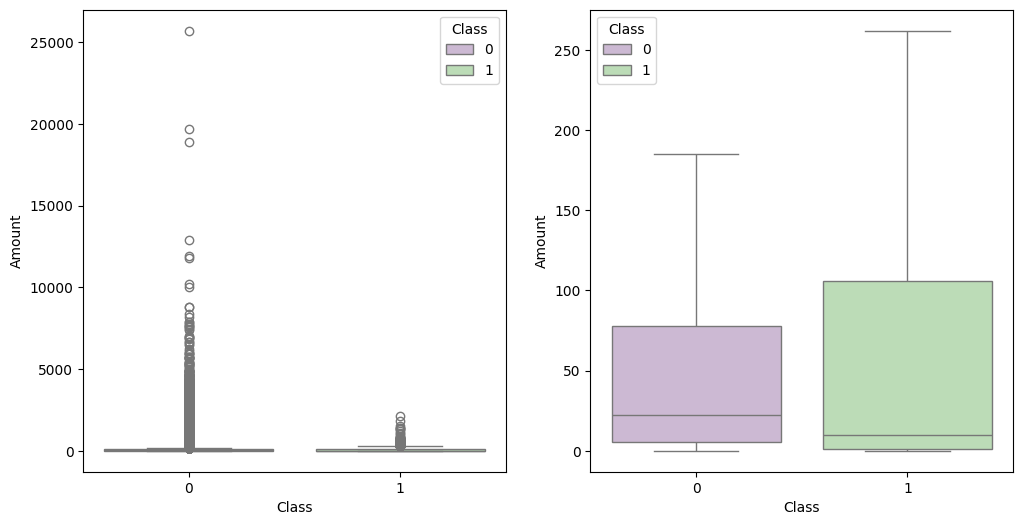

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show()

**Class 0 (Purple):**

- The majority of the transaction amounts for Class 0 are concentrated near the lower end of the scale, but there are numerous outliers reaching very high values.

**Class 1 (Green):**

Similar to Class 0, transaction amounts are mostly clustered near the lower range, with fewer outliers compared to Class 0. These outliers are less extreme.

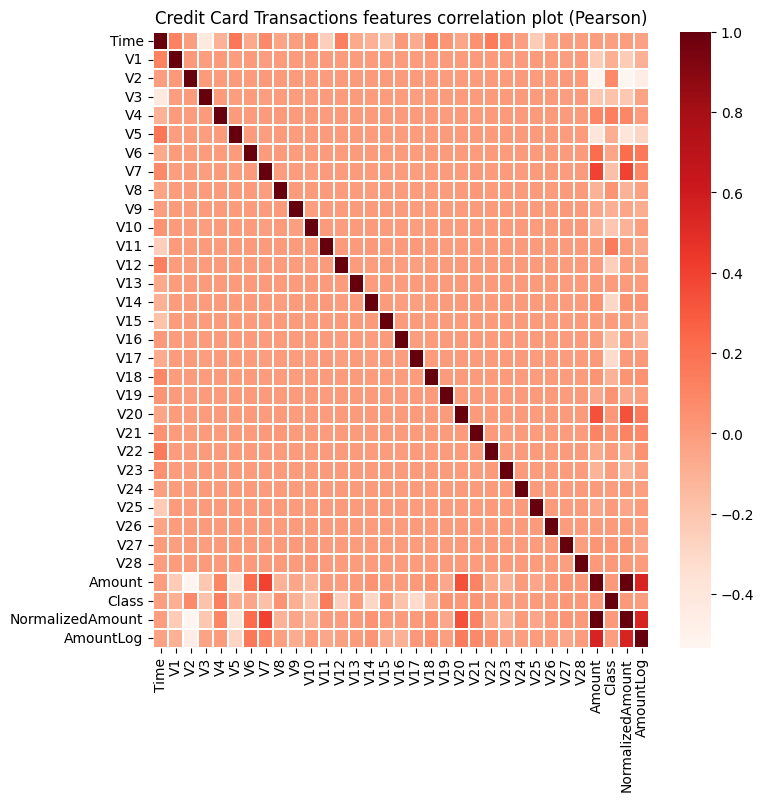

In [35]:
plt.figure(figsize = (8,8))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

**High Correlation Areas:**

- Some off-diagonal cells also show strong correlations (dark or deep red areas), indicating that certain variables are strongly related to each other.

For example, the "Amount" and "NormalizedAmount" variables appear to have some correlation.

- Lighter-colored areas (white to pale orange) indicate weaker or no correlation between the variables.

- Variables like "Class" (likely a categorical target variable) show minimal correlation with most features.

- Any cells with shades of white or light pink represent negative correlations. These are weaker in this dataset.

In [39]:
# Close the connection
conn.close()